# 5b Plotting With Pyradi: Polar and Three-Dimensional Plots

This notebook forms part of a series on [computational optical radiometry](https://github.com/NelisW/ComputationalRadiometry#computational-optical-radiometry-with-pyradi).  The notebooks can be downloaded from [Github](https://github.com/NelisW/ComputationalRadiometry#computational-optical-radiometry-with-pyradi). These notebooks are constantly revised and updated, please revisit from time to time.  

[<img src="https://zenodo.org/badge/doi/10.5281/zenodo.9910.png"   align="left"/>](http://dx.doi.org/10.5281/zenodo.9910)


The date of this document and module versions used in this document are given at the end of the file.  
Feedback is appreciated: neliswillers at gmail dot com.

## Overview

The pyradi library has a module, [`pyradi.ryplot`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html),
to simplify plotting. The module is a productivity wrapper around Matplotlib's [pyplot library](http://matplotlib.org/api/pyplot_api.html), which is in turn a wrapper around [Matplotlib](http://matplotlib.org/).

All that can can be done `pyradi.ryplot` can also be done with raw Matplotlib or pyplot.  The productivity gained with `pyradi.ryplot` stems from the fact that plots and plot properties are all combined into a single function call. So, with just one call a complete graph can be drawn. The code is compact and there is no need to hunt through many pages of documentation to find the appropriate command for some graph attribute. You would, however, have to consult the ryplot documentation for information on the functions long list of parameters.

An understanding of the [Matplotlib histroy and architecture](http://www.aosabook.org/en/matplotlib.html) is not essential to use `pyradi.ryplot` but it may be useful background reading.  `pyradi.ryplot` covers a relatively small part of the full scope of raw Matplotlib or pyplot - there are imense power and many more graphs available in Matplotlib and pyplot, so if `pyradi.ryplot` is too limiting in some area, consider reading wider.

This notebook covers a general introduction to plotting and creating polar and three-dimensional plots. Other plot types are covered in the next notebook in the series.

For an introduction to the `ryplot.Plotter` class, which provides the plotting functionality discussed in this notebook, please see [Plotting With Pyradi: General Plotter Functionality and Cartesian Plots](http://nbviewer.ipython.org/urls/raw.githubusercontent.com/NelisW/ComputationalRadiometry/master/05a-PlottingWithPyradi-GeneralAndCartesian.ipynb?create=1). The information given there is essential for using the functions described in this notebook.

In [1]:
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

In [2]:
%matplotlib inline
import numpy as np
import pyradi.ryplot as ryplot
from matplotlib import cm
import matplotlib.mlab as mlab

# %reload_ext autoreload
# %autoreload 2

## Polar plotting routines

[ryplot.Plotter.polar](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.polar) provides a polar plot facility. 
Given an existing figure, this function plots in a specified subplot position. Note that the radial values or ordinates can be more than one column, each column representing a different line in the plot. This is convenient if large arrays of data must be plotted. If more than one column is present, the label argument can contain the legend labels for each of the columns/lines.  The scale for the radial ordinates can be set with `rscale`. The number of radial grid circles can be set with `rgrid` - this provides a somewhat better control over the built-in radial grid in matplotlib. thetagrids defines the angular grid interval.  The angular rotation direction can be set to be `clockwise` or `counterclockwise`. Likewise, the rotation offset where the plot zero angle must be, is set with `zerooffset`.

[ryplot.Plotter.polar](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.polar) extends the Matplotlib [polar](http://matplotlib.org/api/pyplot_api.html) function in a critical area: on a polar plot negative values are shifted by $\pi$ radians. Hence, negative values are shown on the opposite side of the origin as where they should be. On a polar plot negative values and angle are 'confused' with each other.  [ryplot.Plotter.polar](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.polar) provides two means to handle negative values: 

1. Draw the value with $\pi$ phase shift, but highlight the negative values, so you know when it is negative.

2. Draw the polar plot with a zero offset: the zero value is not at the centre of the circle, but forms a ring around the centre, where the centre is some negative value.

For some obscure reason Matplitlib version 1.13 does not draw negative values on the polar plot.  We therefore force the plot by making the values positive and then highlight it as negative.

The calling signature is

`polar(plotnum, theta, r, ptitle=None, plotCol=None, label=[], labelLocation=[-0.1, 0.1], highlightNegative=True, highlightCol='#ffff00', highlightWidth=4, legendAlpha=0.0, rscale=None, rgrid=None, thetagrid=[30], direction='counterclockwise', zerooffset=0, titlefsize=12, drawGrid=True, zorders=None, clip_on=True, markers=[], markevery=None)`

- `plotnum (int)`  subplot number, 1-based index.
- `theta (np.array[N,] or [N,1])`  angular abscissa in radians.
- `r (np.array[N,] or [N,M])`  radial ordinates - could be M columns.
- `ptitle (string)`  plot title (optional).
- `plotCol ([strings])`  plot colour and line style, list with M entries, use default if None (optional).
- `label  ([strings])`  legend label, list with M entries (optional).
- `labelLocation ([x,y])`  where the legend box should located, in normalized axes coordinates from the 
lower-left corner, using [bbox_to_anchor](http://matplotlib.org/api/legend_api.html#matplotlib.legend.Legend.set_bbox_to_anchor) (optional).
- `highlightNegative (bool)`  indicate if negative data must be highlighted. This highlight is done with a second colour, broader than the data line itself. (optional).
- `highlightCol (string)`  negative highlight colour string (optional).
- `highlightWidth (int)`  negative highlight line width in points(optional).
- `legendAlpha (float)`  transparancy for legend box, allowing you to see through the box to the data underneath. Has no effect for vector graphics graphs, only works for raster rendering (optional).
- `rscale ([rmin, rmax])`  radial plotting limits. If `None` calculate from data sets. If rmin is negative the zero is a circle and rmin is at the centre of the graph (optional).
- `rgrid ([rinc, numinc])`  radial grid. If rgrid is `None` use pyplot default. If rgrid is `None` don't show labels. If rinc=0 then numinc is number of intervals. If rinc is not zero then rinc is the increment and numinc is ignored (optional).
- `thetagrids (float)`  theta grid interval [degrees], if `None` don't show labels (optional).
- `direction (string)` direction in increasing angle, 'counterclockwise' (default) or 'clockwise' (optional).
- `zerooffset (float)` rotation offset where scale zero should be [rad]. Positive zero-offset rotation is counterclockwise from 3'o'clock  (optional).
- `titlefsize (int)`  title font size, default 12pt (optional).
- `drawGrid (bool)` draw a grid on the graph (optional).
- `zorders` ([int]) list of zorder for drawing sequence, highest is last (optional).
- `clip_on` (bool) clips objects to drawing axes (optional).
- `markers` ([string]) markers to be used for plotting data points (optional)
- `markevery` (int | (startind, stride)) subsample when using markers (optional)


The following example shows variation in several of the plot parameters, including direction, zero offset and theta grid intervals.

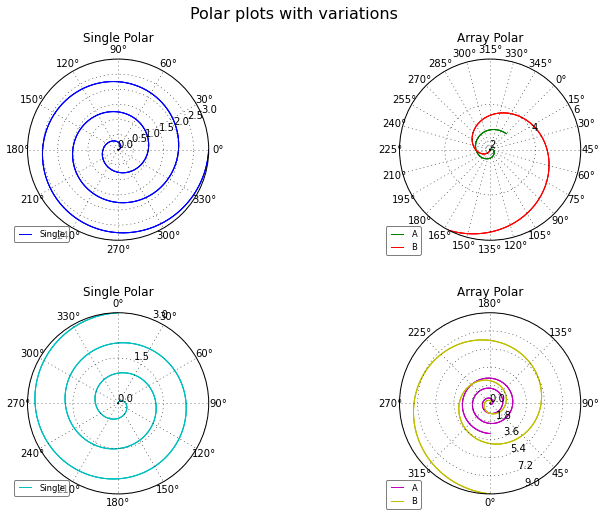

In [3]:
r = np.arange(0, 3.01, 0.01).reshape(-1, 1)
theta = 2*np.pi*r
r2 = np.hstack((r,r**2))
P = ryplot.Plotter(3, 2, 2,'Polar plots with variations', figsize=(12,8))

P.polar(1,theta, r, "Single Polar", label=['Single'],legendAlpha=0.5,rscale=[0,3],
        rgrid=[0.5,3], zerooffset=0)
P.polar(2,theta, r2, "Array Polar", label=['A', 'B'],legendAlpha=0.5,rscale=[2,6],
        rgrid=[2,6], thetagrid=[15], direction=u'clockwise', zerooffset=np.pi/4)
P.polar(3,theta, r, "Single Polar", label=['Single'],legendAlpha=0.5,rscale=[0,3],
        rgrid=[0,3], direction=u'clockwise', zerooffset=np.pi/2)
P.polar(4,theta, r2, "Array Polar", label=['A', 'B'],legendAlpha=0.5,rscale=[0,9]
        ,rgrid=[0,6], thetagrid=[45], direction=u'counterclockwise', zerooffset=-np.pi/2);

The graphs can be overwritten with additional information once created, without losing the original data.

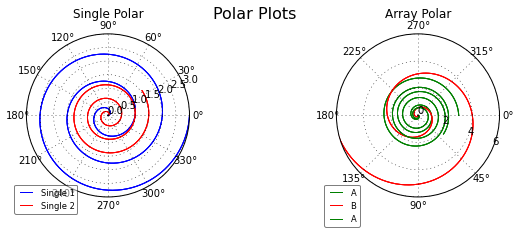

In [4]:
r = np.arange(0, 3.01, 0.01).reshape(-1, 1)
theta = 2*np.pi*r
r2 = np.hstack((r,r**2))
P = ryplot.Plotter(3, 1, 2,'Polar Plots', figsize=(10,3))
P.polar(1,theta, r, "Single Polar", label=['Single 1'],legendAlpha=0.5,rscale=[0,3],
        rgrid=[0.5,3])
P.polar(2,theta, r2, "Array Polar", label=['A', 'B'],legendAlpha=0.5,rscale=[2,6],
        rgrid=[2,6], thetagrid=[45], direction=u'clockwise', zerooffset=0)

#plot again on top of existing graphs
rr = np.arange(0.1, 3.11, 0.01).reshape(-1, 1)
thetar = 2*np.pi*rr
P.polar(1,thetar, 0.5 * rr, "Single Polar", plotCol='r',label=['Single 2'],legendAlpha=0.5,
        rscale=[0,3], rgrid=[0.5,3])
P.polar(2,thetar, 0.75 * rr, "Array Polar", plotCol='g',label=['A', 'B'],legendAlpha=0.5,
        rscale=[0,6], rgrid=[2,6], thetagrid=[45], direction=u'clockwise', zerooffset=0);


The following examples shows how negative values are handled in the polar plots.

1. The first graph shows the positive values in blue and negative values as blue but superimposed on yellow. In this case zero is at the centre of the plot, and negative values has to go through zero  ($\pi$ phase shift).

2. The second graph shows exactly the same result as in the first graph. In this case zero is a circle halfway between the centre and the perimeter. Negative values move through the zero circle towards the centre of the graph.

3. The third graph shows $1 + 3sin(x)$ with an asymmetric positive and negative scale.  The data set is exactly the same as in the next graph.

4.  The fourth graph also shows $1 + 3sin(x)$ with an asymmetric positive and negative scale, but with different rscale limits.

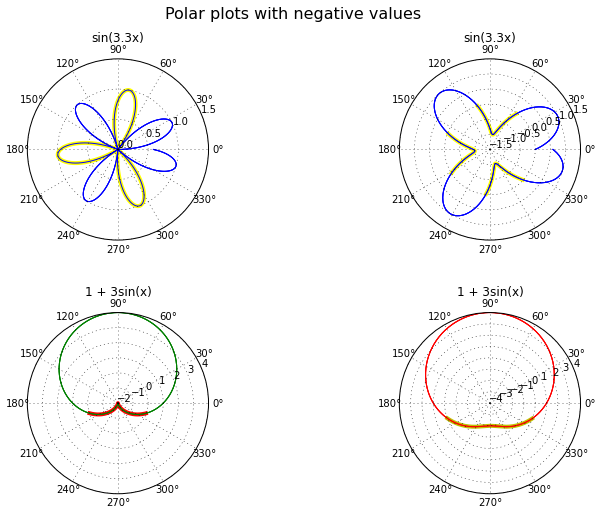

In [5]:
theta=np.linspace(0,2.0*np.pi,600)
r = np.sin(3.4*theta)
PN = ryplot.Plotter(3, 2, 2,'Polar plots with negative values', figsize=(12,8))
PN.polar(1,theta, r, "sin(3.3x)",legendAlpha=0.5,rscale=[0,1.5], rgrid=[0.5,1.5],
         highlightNegative=True)
PN.polar(2,theta, r, "sin(3.3x)", plotCol=['b'], legendAlpha=0.5, rscale=[-1.5,1.5], 
         rgrid=[0.5,1.5], highlightNegative=True)

tt = np.linspace(0,2 * np.pi,360)
rr = 1 + 3 * np.sin(tt)
PN.polar(3,tt, rr, "1 + 3sin(x)", legendAlpha=0.5, rscale=[-2,4], rgrid=[1,0],
         highlightNegative=True,  highlightCol='r',highlightWidth=4)

PN.polar(4,tt,rr, "1 + 3sin(x)", legendAlpha=0.5, rgrid=[1,0], highlightNegative=True,
         highlightCol='y', highlightWidth=4, rscale=[-4,4]);

The following example experiments with the radial grid density.  

1. The first graph does not show the radial and angular grids.

2. The second example states that there should be ten radial grid circles.

3. The third example shows that the radial grid interval must be 1.

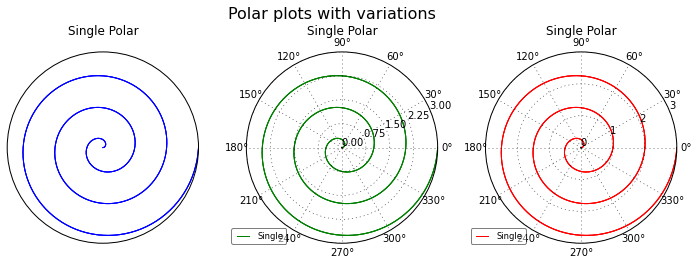

In [6]:
r = np.arange(0, 3.01, 0.01).reshape(-1, 1)
theta = 2*np.pi*r
r2 = np.hstack((r,r**2))
P = ryplot.Plotter(3, 1, 3,'Polar plots with variations', figsize=(12,4))
P.polar(1,theta, r, "Single Polar", legendAlpha=0.5,
        rscale=[0,3], zerooffset=0, rgrid=None, thetagrid=None, drawGrid=None)
P.polar(2,theta, r, "Single Polar", label=['Single'], legendAlpha=0.5,
        rscale=[0,3], zerooffset=0, rgrid=[0, 5])
P.polar(3,theta, r, "Single Polar", label=['Single'], legendAlpha=0.5,
        rscale=[0,3], zerooffset=0, rgrid=[1, 3]);

## Three-dimensional plots

### Three-dimensional line plots

The [ryplot.Plotter.plot3d](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.plot3d) function takes three vectors in $(x,y,z)$ and plots them on a three-dimensional grid.

Given an existing figure, this function plots in a specified subplot position.
Note that multiple 3D data sets can be plotted simultaneously by adding additional columns to
the input coordinates of the $(x,y,z)$ arrays, each set of columns representing a different line in the plot.
This is convenient if large arrays of data must be plotted. If more than one column is present,
the label argument can contain the legend labels for each of the columns/lines.
The function signature is

`plot3d(plotnum, x, y, z, ptitle=None, xlabel=None, ylabel=None, zlabel=None, 
        plotCol=[], label=None, legendAlpha=0.0, titlefsize=12,
        xylabelfsize = 12, xInvert=False, yInvert=False, zInvert=False,scatter=False,
        markers=None, markevery=None, azim=45, elev=30, zorders=None, clip_on=True,
        edgeCol=None)`
               
- `plotnum (int)`  subplot number, 1-based index.
- `x (np.array[N,] or [N,M])`  x coordinates of each line.
- `y (np.array[N,] or [N,M])`  y coordinates of each line.
- `z (np.array[N,] or [N,M])`  z coordinates of each line.
- `ptitle (string)`  plot title (optional).
- `xlabel (string)`  x-axis label (optional).
- `ylabel (string)`  y-axis label (optional).
- `zlabel (string)`  z axis label (optional).
- `plotCol ([strings])`   plot line colour and style, list with M entries (optional), use class default if not supplied. Each new plot line is rendered with the next colour in the list, repeating the sequence if necessary. Entries in this list must be of the form `['b',  'g--',  'r-.']` defining the colour in the first character and the linestyle with the remaining characters (optional).
- `linewidths ([float])` plot line width in points, list with M entries, use default if None  (optional).
- `pltaxis ([xmin, xmax, ymin, ymax, zmin, zmax])`  scale for x,y,z axes.  Let Matplotlib decide if None. (optional)
- `label  ([strings])`  legend label for ordinate, list with M entries (optional).
- `legendAlpha (float)`  transparency for legend box. This only works for bitmap files, not for eps files (optional).
- `titlefsize (int)`  title font size, default 12pt (optional).
- `xylabelfsize (int)`  x, y, z label font size, default 12pt (optional).
- `xInvert (bool)`  invert the x-axis. Flip the x-axis left-right. (optional).
- `yInvert (bool)`  invert the y-axi. Flip the y-axis left-right. (optional).
- `zInvert (bool)`  invert the z-axis. Flip the z-axis up-down. (optional).
- `scatter (bool)` draw only the points, no lines (optional)
- `markers ([string])` markers to be used for plotting data points (optional)
- `markevery (int | (startind, stride))` subsample when using markers (optional)
- `azim (float)` graph view azimuth angle  [degrees] (optional)
- `elev (float)` graph view evelation angle  [degrees] (optional)
- `zorders ([int])` list of zorder for drawing sequence, highest is last (optional).
- `clip_on (bool)` clips objects to drawing axes (optional).
- `edgeCol ([int])` list of colour specs, value at [0] used for edge colour (optional).            

The first example draws three lines consecutively in the $(x,y,z)$ grid, inverting the $z$ axis.

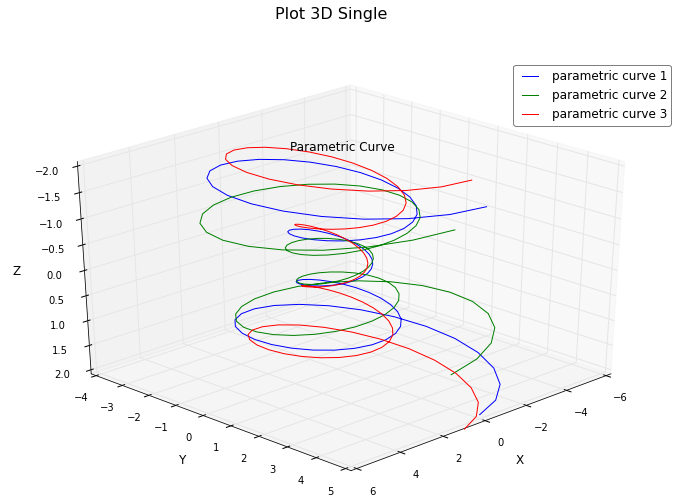

In [7]:
def parametricCurve(z, param1 = 2, param2 = 1):
    r = z**param1 + param2
    theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
    return (r * np.sin(theta), r * np.cos(theta))

z = np.linspace(-2, 2, 100)
x, y = parametricCurve(z)

P3D = ryplot.Plotter(6, 1, 1,'Plot 3D Single', figsize=(12,8))
plabel = ['parametric curve 1', 'parametric curve 2', 'parametric curve 3']
P3D.plot3d(1, x.T, y.T, z.T, 'Parametric Curve', 'X', 'Y', 'Z', legendAlpha=0.5, zInvert=True)
P3D.plot3d(1, 1.3*x.T, 0.8*y.T, 0.7*z.T, 'Parametric Curve', 'X', 'Y', 'Z', legendAlpha=0.5, zInvert=True)
P3D.plot3d(1, 0.8*x.T, 0.9*y.T, 1.2*z.T, 'Parametric Curve', 'X', 'Y', 'Z', label=plabel, legendAlpha=0.5, zInvert=True);

The second example creates an array of three lines and plots the array in one command. The line widths for the lines differ.

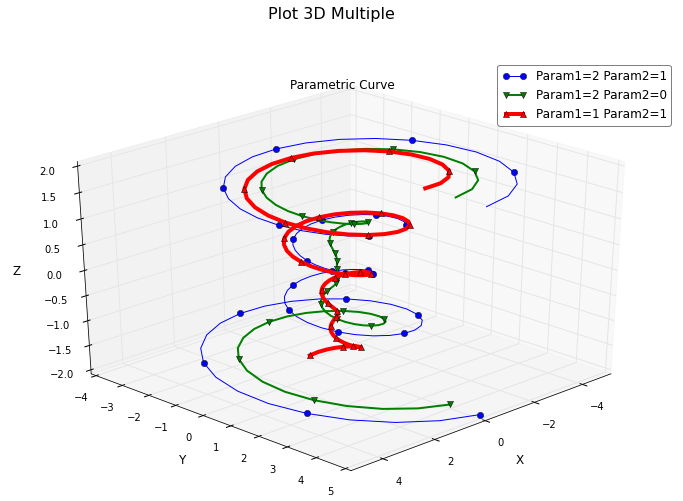

In [8]:
label = ['Param1={} Param2={}'.format(2,1)]
for i in range(2):
    param1 = 2-i
    param2 = i
    label.append('Param1={} Param2={}'.format(param1, param2))
    x1, y1 = parametricCurve(z, param1, param2)
    x = np.vstack((x,x1))
    y = np.vstack((y,y1))

z = np.vstack((z,z,z))

P3D = ryplot.Plotter(8, 1, 1,'Plot 3D Multiple', figsize=(12,8))
P3D.plot3d(1, x.T, y.T, z.T, 'Parametric Curve', 'X', 'Y', 'Z', label=label, legendAlpha=0.5, 
           linewidths=[1,2,4],markers=['o','v','^','<'],markevery=4);

This example plots a single line, but also shows projections on each of the axes. In this example separate subplots are used for the individual graphs.

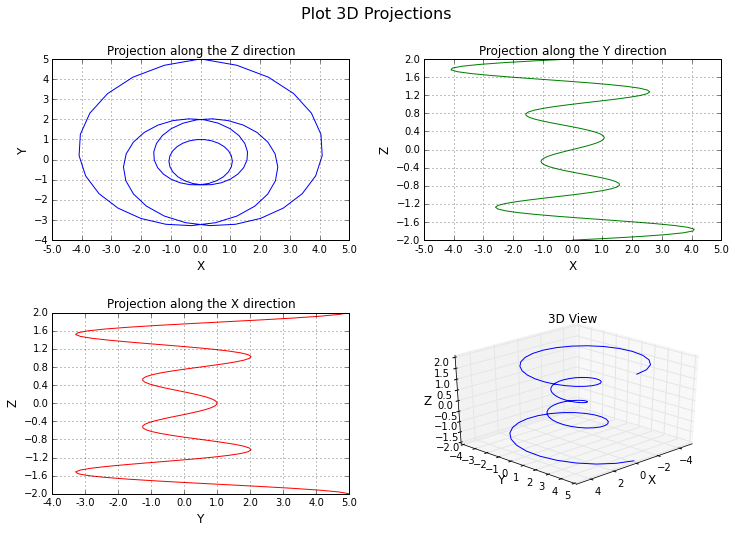

In [9]:
z = np.linspace(-2, 2, 100)
x, y = parametricCurve(z)

P3D = ryplot.Plotter(7, 2, 2,'Plot 3D Projections', figsize=(12,8))
P3D.plot(1, x.T, y.T, 'Projection along the Z direction', 'X', 'Y')
P3D.plot(2, x.T, z.T, 'Projection along the Y direction', 'X', 'Z')
P3D.plot(3, y.T, z.T, 'Projection along the X direction', 'Y', 'Z')
P3D.plot3d(4, x.T, y.T, z.T, '3D View', 'X', 'Y', 'Z');

The following example plots the projections along the $(x,y,z)$ axes on the same plot as the three-dimensional line. The line style and line width of each of the lines are adjusted to assist in readability.

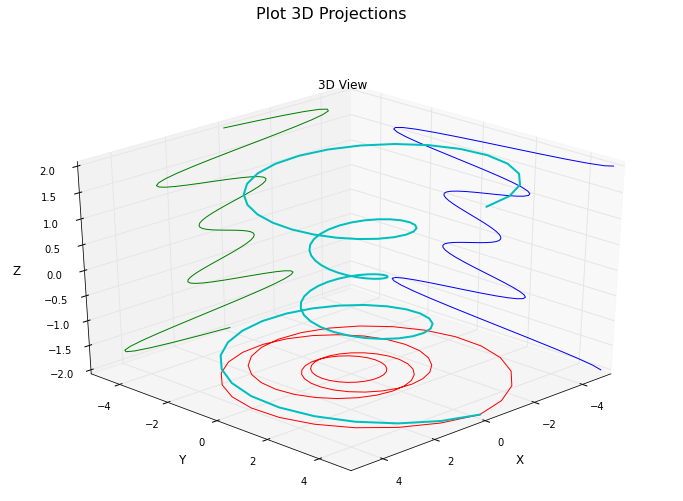

In [10]:
z = np.linspace(-2, 2, 100)
x, y = parametricCurve(z)

P3D = ryplot.Plotter(7, 1, 1,'Plot 3D Projections', figsize=(12,8))
P3D.plot3d(1, -5*np.ones(x.T.shape), y.T, z.T, plotCol=['r'])
P3D.plot3d(1, x.T, -5*np.ones(y.T.shape), z.T, plotCol=['b'])
P3D.plot3d(1, x.T, y.T, -2*np.ones(z.T.shape), plotCol=['g'])
P3D.plot3d(1, x.T, y.T, z.T, '3D View', 'X', 'Y', 'Z', plotCol=['k'], linewidths=[2], pltaxis=[-5, 5, -5, 5, -2, 2]);

### Three-dimensional $(x,y,z)$ mesh plots

The [ryplot.Plotter.mesh3D](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html?highlight=mesh3d#pyradi.ryplot.Plotter.mesh3D) function provides a three-dimensional colour mesh plot for three-dimensional $(x,y,z)$ array input sets.
The mesh grid is defined in $(x,y)$, while the height of the mesh is the $z$ value.

Given an existing figure, this function plots in a specified subplot position.
Only one mesh is drawn at a time.  Future meshes in the same subplot
will cover any previous meshes.

The data set must have three two dimensional arrays, each for x, y, and z.  The data in x, y, and z arrays must have matching data points.  The x and y arrays each define the grid in terms of x and y values, i.e., the x array contains the x values for the data set, while the y array contains the y values.  The z array contains the z values for the corresponding x and y values in the mesh.

Use wireframe=True to obtain a wireframe plot.

Use surface=True to obtain a surface plot with fill colours.

Z-values can be plotted on a log scale, in which case the colourbar is adjusted
to show true values, but on the nonlinear scale.

The xvals and yvals vectors may have non-constant grid-intervals, i.e., they do not
have to be on regular intervals, but z array must correspond to the (x,y) grid.

The function signature is

`mesh3D(plotnum, xvals, yvals, zvals, ptitle=None, xlabel=None, ylabel=None, zlabel=None, 
        rstride=1, cstride=1, linewidth=0, plotCol=[], pltaxis=None, maxNX=0, maxNY=0, maxNZ=0,
        xScientific=False, yScientific=False, zScientific=False, powerLimits = [-4,  2,  -4,  2, -2, 2], 
        titlefsize = 12, xylabelfsize = 12, xytickfsize = 10, wireframe=False, surface=True, 
        cmap = cm.rainbow, 
        cbarshow=False, cbarorientation = 'vertical', cbarcustomticks=[], cbarfontsize = 12,
        drawGrid = True, xInvert=False, yInvert=False, zInvert=False, logScale=False, 
        alpha=1, alphawire=1, azim=45, elev=30, zorders=None, clip_on=True )`
                   
                   
- `plotnum (int)`  subplot number, 1-based index.
- `xvals (np.array[N,M])`  array of x values, corresponding to (x,y) grid.
- `yvals (np.array[N,M])`  array of y values, corresponding to (x,y) grid.
- `zvals (np.array[N,M])`  array of z values corresponding to (x,y) grid.
- `ptitle (string)`  plot title (optional).
- `xlabel (string)`  x axis label (optional).
- `ylabel (string)`  y axis label (optional).
- `zlabel (string)`  z axis label (optional).
- `rstride (int)`  mesh line row (y axis) stride, every rstride value along y axis (optional).
- `cstride (int)`  mesh line column (x axis)  stride, every cstride value along x axis (optional).
- `linewidth (float)`  mesh line width in points (optional).
- `plotCol ([strings])`  fill colour, list with M=1 entries, linetype is not used. use default if None (optional).
- `edgeCol ([strings])`  mesh line/edge colour , list with M=1 entries, use default if None (optional).
- `pltaxis ([xmin, xmax, ymin, ymax, zmin, zmax])`  scale for x,y axes. z scale is not settable.  Let Matplotlib decide if None (optional).
- `maxNX (int)`  draw maxNX+1 tick labels on x axis (optional).
- `maxNY (int)`  draw maxNY+1 tick labels on y axis (optional).
- `maxNZ (int)`  draw maxNY+1 tick labels on z axis (optional).
- `xScientific (bool)`  use scientific notation on x axis, use this to control the density of the x-axis grid and tick label density (optional).
- `yScientific (bool)`  use scientific notation on y axis, use this to control the density of the x-axis grid and tick label density (optional).
- `zScientific (bool)`  use scientific notation on z-axis, use this to control the density of the x-axis grid and tick label density (optional).
- `powerLimits[float]`   scientific tick label power limits [x-low, x-high, y-low, y-high]  (optional).  Scientific notation is used for data less than 10$^{\rm low}$ or data greater than 10$^{\rm high}$. Inside this range, the notation is fixed format.  For example `powerlimits=[-3, 4, -3, 4]` defines scientific notation is used for numbers less than 1e-3 or greater than 1e4. For this to work the x or y axis must be set to scientific notation (`xScientific` and/or `yScientific` must be `True`) (optional).
- `titlefsize (int)`  title font size, default 12pt (optional).
- `xylabelfsize (int)`  x-axis, y-axis, z-axis label font size, default 12pt (optional).
- `xytickfsize (int)`  x-axis, y-axis, z-axis tick font size, default 10pt (optional).
- `wireframe (bool)` If True, do a wireframe plot,  (optional)
- `surface (bool)` If True, do a surface plot,  (optional)
- `cmap (cm)`  color map for the mesh (optional) (optional).
- `cbarshow (bool)`  if true, the show a colour bar (optional).
- `cbarorientation (string)`  'vertical' (right) or 'horizontal' (below) (optional).
- `cbarcustomticks zip([z values/float],[tick labels/string])`  define custom colourbar ticks locations for given z values(optional).
- `cbarfontsize (int)`  font size for colour bar (optional).
- `drawGrid (bool)`  draw the grid on the plot (optional).
- `xInvert (bool)`  invert the x-axis. Flip the x-axis left-right. (optional).
- `yInvert (bool)`  invert the y-axi. Flip the y-axis left-right. (optional).
- `zInvert (bool)`  invert the z-axis. Flip the z-axis up-down. (optional).
- `logScale (bool)`  do Z values on log scale, recompute colourbar values (optional).
- `alpha (float)` surface transparency (optional)
- `alphawire (float)` mesh transparency (optional)
- `azim (float)` graph view azimuth angle  [degrees] (optional)
- `elev (float)` graph view evelation angle  [degrees] (optional)
- `distance (float)` distance between viewer and plot (optional)
- `zorders` ([int]) list of zorder for drawing sequence, highest is last (optional).
- `clip_on` (bool) clips objects to drawing axes (optional).

A two-dimensional plot has only only one sensible view, perpendicular on the plane of the graph.  A three-dimensional plot has many possible views. The view in the plot can be set by using the `elev` and `azim` values.

The 
[`ryplot.Plotter.meshContour`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.meshContour) function expects a mesh input. The mesh grid is defined in two arrays, the X array and the Y array, created with `numpy.meshgrid`.  The `meshgrid` function returns two two-dimensional arrays, one
*varying along the x direction, with fixed y values* 
and the other 
*varying along the y direction, with fixed x values*. Study the following code to see this in action:

    x = numpy.array([1, 2, 3])
    y = numpy.array([10, 20, 30]) 
    XX, YY = numpy.meshgrid(x, y)
    ZZ = XX + YY

    ZZ => array([[11, 12, 13],
                 [21, 22, 23],
                 [31, 32, 33]])

The two arrays, taken together, provides a collection of all possible combinations of x and y values, but in a structured manner: x varying along one axis and y varying along the other axis.  The z array provides the z values for the corresponding x and y values.

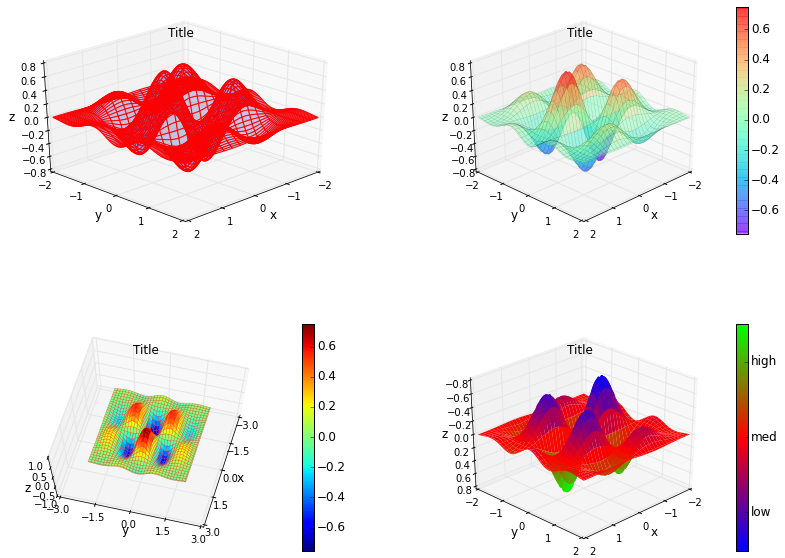

In [11]:
def myFunc(x,y):
  scale = np.sqrt(np.exp(-(x**2 +y**2)))
  return np.sin(2 * x) * np.cos(4 * y) * scale

x = np.linspace(-2, 2, 101)
y = np.linspace(-2, 2, 101)
varx, vary = np.meshgrid(x, y)
zdata = myFunc(varx.flatten(), vary.flatten()).reshape(varx.shape)

p = ryplot.Plotter(1,2,2,figsize=(14,10))
p.mesh3D(1, varx, vary, zdata, ptitle='Title', xlabel='x', ylabel='y', zlabel='z',
  rstride=1, cstride=6, linewidth= 1, maxNX=5, maxNY=5, maxNZ=0, wireframe=True,
  edgeCol=['r'], drawGrid=True, cbarshow=True, cmap=None, alpha=0.2)

p.mesh3D(2, varx, vary, zdata, ptitle='Title', xlabel='x', ylabel='y', zlabel='z',
  plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.1, maxNX=5, maxNY=5, maxNZ=0,
  drawGrid=True, cbarshow=True, alpha=0.5)

p.mesh3D(3, varx, vary, zdata, ptitle='Title', xlabel='x', ylabel='y', zlabel='z',
  rstride=3, cstride=3, linewidth= 0.2, maxNX=5, maxNY=5, maxNZ=0,
  drawGrid=True, cmap=cm.jet,  cbarshow=True, elev=70, azim=15,
  pltaxis=[-3, 3, -3, 3, -1, 1])

barticks = zip([-0.5, 0, 0.5], ['low', 'med', 'high'])
p.mesh3D(4, varx, vary, zdata, ptitle='Title', xlabel='x', ylabel='y', zlabel='z',
  rstride=3, cstride=3, linewidth= 0, maxNX=5, maxNY=5, maxNZ=0, drawGrid=True,
  cmap=cm.brg, cbarshow=True, cbarcustomticks=barticks, zInvert=True);

### Contour and filled contour cartesian plots

The 
[`ryplot.Plotter.meshContour`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.meshContour) function provide a  countour plot capability, variations of countour lines and colour filling.  The data values must be given on a fixed mesh grid of three-dimensional $(x,y,z)$ array input sets.
The mesh grid is defined in $(x,y)$, while the height of the mesh is the $z$ value.

Given an existing figure, this function plots in a specified subplot position.
Only one contour plot is drawn at a time.  Future contours in the same subplot
will cover any previous contours.

The data set must have three two dimensional arrays, each for x, y, and z.  The data in x, y, and z arrays must have matching data points.  The x and y arrays each define the grid in terms of x and y values, i.e., the x array contains the x values for the data set, while the y array contains the y values.  The z array contains the z values for the corresponding x and y values in the contour mesh.

Z-values can be plotted on a log scale, in which case the colourbar is adjusted
to show true values, but on the nonlinear scale.

The current version only saves png files, since there appears to be a problem saving eps files.

The function signature is
`meshContour(plotnum, xvals, yvals, zvals, numLevels=10,
             ptitle=None, xlabel=None, ylabel=None, shading='flat',
             plotCol=[], pltaxis=None, maxNX=0, maxNY=0,
             xScientific=False, yScientific=False, powerLimits=[-4,  2,  -4,  2], 
             titlefsize=12, xylabelfsize=12, xytickfsize=10,
             meshCmap=cm.rainbow, cbarshow=False, cbarorientation='vertical', 
             cbarcustomticks=[], cbarfontsize=12, drawGrid=False, 
             yInvert=False, xInvert=False, contourFill=True, contourLine=True, logScale=False,
             negativeSolid=False, zeroContourLine=None,
             contLabel=False, contFmt='%.2f', contCol='k', contFonSz=8, contLinWid=0.5, 
             zorders=None, clip_on=True)`


- `plotnum (int)` The subplot number, 1-based index, according to Matplotlib conventions.  This value must always be given, even if only a single 1,1 subplot is used. 
- `xvals (np.array[N,M])`  array of x values, corresponding to (x,y) grid.
- `yvals (np.array[N,M])`  array of y values, corresponding to (x,y) grid.
- `zvals (np.array[N,M])`  array of z values corresponding to (x,y) grid.
- `levels (int or [float])` number of contour levels or a list of levels (optional). If an integer is given, it will cause as many contour lines. If a list of floats is given, the values in the list will be the contour lines.
- `ptitle (string)` plot title (optional)
- `xlabel (string)` x axis label (optional)
- `ylabel (string)` y axis label (optional)
- `shading (string)`  not used currently (optional)
- `plotCol ([strings])`  fill colour, list with M=1 entries, linetype is not used. use default if None (optional).
- `pltaxis ([xmin, xmax, ymin,ymax])` scale for x,y axes. Let Matplotlib decide if None. (optional)
- `maxNX (int)` draw maxNX+1 tick labels on x axis (optional)
- `maxNY (int)` draw maxNY+1 tick labels on y axis (optional)
- `xScientific (bool)` use scientific notation on x axis (optional)
- `yScientific (bool)` use scientific notation on y axis (optional)
- `powerLimits[float]`   scientific tick label power limits [x-low, x-high, y-low, y-high]  (optional).  Scientific notation is used for data less than 10$^{\rm low}$ or data greater than 10$^{\rm high}$. Inside this range, the notation is fixed format.  For example `powerlimits=[-3, 4, -3, 4]` defines scientific notation is used for numbers less than 1e-3 or greater than 1e4. For this to work the x or y axis must be set to scientific notation (`xScientific` and/or `yScientific` must be `True`) (optional).
- `titlefsize (int)` title font size, default 12pt (optional)
- `xylabelfsize (int)` x-axis, y-axis label font size, default 12pt (optional)
- `xytickfsize (int)` x-axis, y-axis tick font size, default 10pt (optional)
- `meshCmap (cm)` colour map for the mesh fill (optional)
- `cbarshow (bool)` if true, the show a colour bar (optional)
- `cbarorientation (string)` 'vertical' (right) or 'horizontal' (below) (optional)
- `cbarcustomticks zip([z values/float],[tick labels/string])`  define custom colourbar ticks locations for given z values(optional).
- `cbarfontsize (int)` font size for colour bar (optional)
- `drawGrid (bool)` draw the grid on the plot (optional)
- `xInvert (bool)`  invert the x-axis. Flip the x-axis left-right. (optional).
- `yInvert (bool)`  invert the y-axi. Flip the y-axis up-down. (optional).
- `contourFill (bool)` fill contours with colour (optional).
- `contourLine (bool)` draw a series of contour lines (optional).
- `logScale (bool)` do Z values on log scale, recompute colourbar values (optional).
- `negativeSolid (bool)` draw negative contours in solid lines, dashed otherwise (optional).
- `zeroContourLine (double)` draw a single contour at given value (optional).
- `contLabel (bool)` label the contours with values (optional).
- `contFmt (string)` contour label c-printf format (optional).
- `contCol (string)` contour label colour, e.g., 'k' (optional).
- `contFonSz (float)` contour label fontsize (optional).
- `contLinWid (float)` contour line width in points (optional).
- `zorders` ([int]) list of zorder for drawing sequence, highest is last (optional).
- `clip_on` (bool) clips objects to drawing axes (optional).



C:\Anaconda\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Anaconda\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


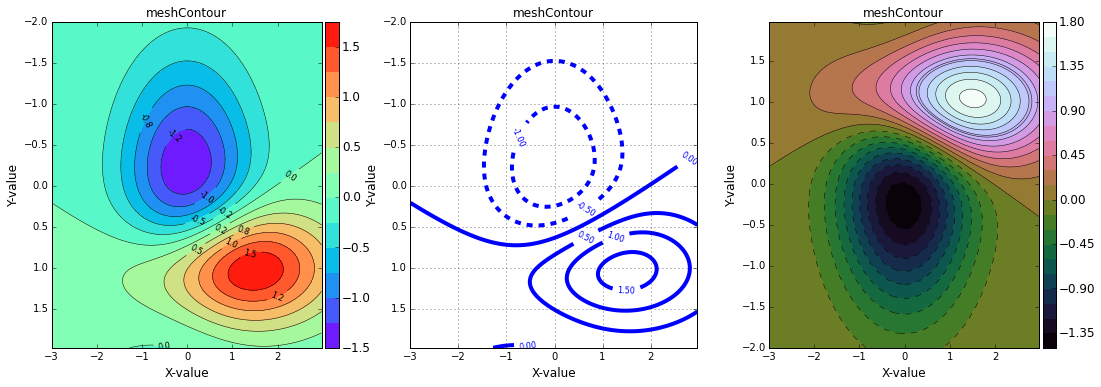

In [12]:
%matplotlib inline
import numpy as np
import pyradi.ryplot as ryplot
from matplotlib import cm
import matplotlib.mlab as mlab
#create the input data
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)

#do the plot
pmc = ryplot.Plotter(1,1,3, figsize=(18,6))

pmc.meshContour(1, X, Y, Z, levels=15, ptitle='meshContour', xlabel='X-value', ylabel='Y-value',
                plotCol=['k'], titlefsize=12, meshCmap=cm.rainbow, cbarshow=True,
                cbarorientation='vertical', cbarfontsize=12, drawGrid=False, yInvert=True, 
                negativeSolid=True, contourFill=True, contourLine=True, logScale=False,
                contLabel=True, contFmt='%.1f', contCol='k', contFonSz=8);

pmc.meshContour(2, X, Y, Z, levels=[-1.5, -1, -0.5, 0, 0.5, 1.0, 1.5], ptitle='meshContour', xlabel='X-value', ylabel='Y-value',
                plotCol=['b'], titlefsize=12, meshCmap=cm.rainbow, cbarshow=False,
                cbarorientation='vertical', cbarfontsize=12, drawGrid=True, yInvert=True, 
                negativeSolid=False, contourFill=False, contourLine=True, logScale=False,
                contLabel=True, contFmt='%.2f', contCol='b', contFonSz=8, contLinWid=4 );

pmc.meshContour(3, X, Y, Z, levels=30, ptitle='meshContour', xlabel='X-value', ylabel='Y-value',
                plotCol=['k'], titlefsize=12, meshCmap=ryplot.cubehelixcmap(),zeroContourLine=True,
                cbarshow=True, cbarorientation='vertical', cbarfontsize=12, drawGrid=False, 
                negativeSolid=False, contourFill=True, contourLine=True, logScale=False);


### Contour and filled contour polar plots

The [ryplot.Plotter.polarMesh](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html?highlight=polarmesh#pyradi.ryplot.Plotter.polarMesh) function provides a contour and filled contour graph on a polar axis system.
The data values must be given on a fixed mesh grid of three-dimensional $(\theta,\rho,z)$ array input sets ($\theta$ is angle,  and $\rho$ is radial distance).
The mesh grid is defined in $(\theta,\rho)$, while the height of the mesh is the $z$ value.
The $(\theta,\rho)$ arrays may have non-constant grid-intervals, i.e., they do not
have to be on regular intervals.
        
Given an existing figure, this function plots in a specified subplot position.
Only one contour plot is drawn at a time.  Future contours in the same subplot
will cover any previous contours.

The data set must have three two dimensional arrays, each for $\theta$, $\rho$, and z.  The data in $\theta$, $\rho$, and z arrays must have matching data points.  The $\theta$ and $\rho$ arrays each define the grid in terms of $\theta$ and $\rho$ values, i.e., the $\theta$ array contains the angular values for the data set, while the $\rho$ array contains the radial values.  The z array contains the z values for the corresponding $\theta$ and $\rho$ values in the contour mesh.

Z-values can be plotted on a log scale, in which case the colourbar is adjusted
to show true values, but on the nonlinear scale.

The current version only saves png files, since there appears to be a problem saving eps files.

The function signature is
`polarMesh(plotnum, theta, radial, zvals, ptitle=None, shading='flat',
           radscale=None, titlefsize=12,  meshCmap=cm.rainbow, cbarshow=False, 
           cbarorientation='vertical', cbarcustomticks=[], cbarfontsize=12,
           rgrid=[0,5], thetagrid=[30], drawGrid=False,
           thetagridfontsize=12, radialgridfontsize=12,
           direction='counterclockwise', zerooffset=0, logScale=False,
           plotCol=[], levels=10, contourFill=True, contourLine=True, 
           zeroContourLine=None, negativeSolid=False,
           contLabel=False, contFmt='%.2f', contCol='k', contFonSz=8, contLinWid=0.5, 
           zorders=None, clip_on=True)`

- `plotnum (int)` subplot number, 1-based index
- `theta (np.array[N,M])` array of angular values [0..2pi] corresponding to (theta,rho) grid.
- `radial (np.array[N,M])` array of radial values  corresponding to (theta,rho) grid.
- `zvals (np.array[N,M])` array of z values  corresponding to (theta,rho) grid.
- `ptitle (string)` plot title (optional).
- `shading (string)` 'flat' | 'gouraud'  (optional).
- `rscale ([rmin, rmax])`: radial plotting limits. use default setting if None. If rmin is negative the zero is a circle and rmin is at the centre of the graph (optional).
- `rgrid ([rinc, numinc])`: radial grid. If rgrid is `None` don't show labels. If rgrid is None use pyplot default. If rinc=0 then numinc is number of intervals. If rinc is not zero then rinc is the increment and numinc is ignored (optional).
- `thetagrids (float)`: theta grid interval [degrees], If thetagrids is `None` don't show labels. (optional).
- `titlefsize (int)` title font size, default 12pt (optional).
- `meshCmap (cm)` color map for the mesh (optional).
- `cbarshow (bool)` if true, the show a color bar (optional).
- `cbarorientation (string)` 'vertical' (right) or 'horizontal' (below) (optional).
- `cbarcustomticks zip([z values/float],[tick labels/string])`  define custom colourbar ticks locations for given z values(optional).
- `cbarfontsize (int)` font size for color bar (optional).
- `drawGrid (bool)` draw the grid on the plot (optional).
- `thetagridfontsize (float)` font size for the angular grid (optional).
- `radialgridfontsize (float)` font size for the radial grid (optional).
- `direction (string)` direction in increasing angle, 'counterclockwise' (default) or 'clockwise' (optional).
- `zerooffset (float)` rotation offset where scale zero should be [rad]. Positive zero-offset rotation is counterclockwise from 3'o'clock  (optional).
- `logScale (bool)` do Z values on log scale, recompute colourbar values  (optional).
- `plotCol ([strings])`  contour line colour, list with M=1 entries, linetype is not used. use default if None (optional).
- `levels (int or [float])` number of contour levels or a list of levels (optional).
- `contourFill (bool)` fill contours with colour (optional).
- `contourLine (bool)` draw a series of contour lines  (optional).
- `zeroContourLine (double)` draw a contour at the stated value (optional).
- `negativeSolid (bool)` draw negative contours in solid lines, dashed otherwise (optional).
- `contLabel (bool)` label the contours with values (optional).
- `contFmt (string)` contour label c-printf format (optional).
- `contCol (string)` contour label colour, e.g., 'k' (optional).
- `contFonSz (float)` contour label fontsize (optional).
- `contLinWid (float)` contour line width in points (optional).
- `zorders` ([int]) list of zorder for drawing sequence, highest is last (optional).
- `clip_on` (bool) clips objects to drawing axes (optional).


The angle and radial values must also be given in meshgrid format.
The order of $\theta$ and $\rho$ in the meshgrid is important. 
Please follow the exact p,r order given here.

Comments on the graphs below:

1. Graph with no angle and radial tick marks. Negative contour lines are shown in dashed form. The `levels` setting is used to display 20 contour lines.

2. The `levels` setting is used to create a number of contour levels that are note evenly spaced.  The graph is not filled, only contourlines are shown. Contour lines are labelled and given a thick line.

3. The `radscale[0]` setting is negative - but there are no data points for negative radial, hence the centre of the graph is empty. No contour lines are shown. Note how the appearance of the contours change, the empty centre is a form of geometric distortion of the graph.

C:\Anaconda\lib\site-packages\matplotlib\contour.py:381: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


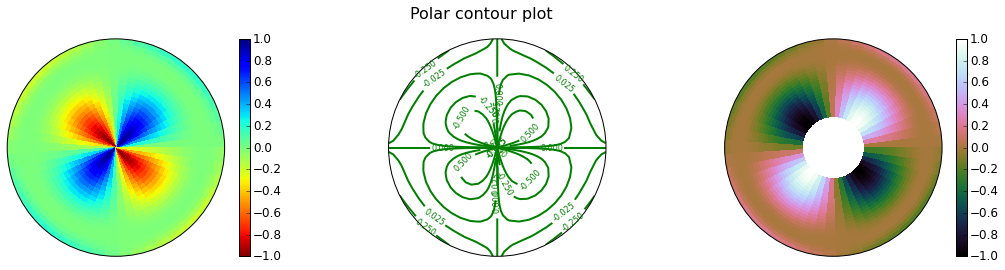

In [13]:
p = np.linspace(0,2*np.pi,50)
r = np.linspace(0,1.25,25)
P,R = np.meshgrid(p,r)
value = ((R**2 - 1)**2) * np.sin(2 * P)
p3D = ryplot.Plotter(1, 1, 3,'Polar contour plot',figsize=(18,4))

ax = p3D.polarMesh(1, p, r, value, meshCmap = cm.jet_r, cbarshow=True,
          drawGrid=False, rgrid=None, thetagrid=None, levels=20,
          thetagridfontsize=10, radialgridfontsize=8,
          direction='counterclockwise', zerooffset=0)

ax = p3D.polarMesh(2, p, r, value, meshCmap = cm.jet_r, cbarshow=False,
          drawGrid=False, rgrid=None, thetagrid=None, plotCol=['g'],
          levels=[-1, -0.5,  -0.25, -0.025, 0, 0.025, 0.25, 0.5, 1],
          thetagridfontsize=10, radialgridfontsize=8, negativeSolid=True,
          direction='counterclockwise', zerooffset=0,contourFill=False,contourLine=True,
          contLabel=True, contFmt='%.3f', contCol='g', contFonSz=8, contLinWid=2)

ax = p3D.polarMesh(3, p, r, value, meshCmap = ryplot.cubehelixcmap(), cbarshow=True,
          drawGrid=False, rgrid=None, thetagrid=None, 
          levels=10, contCol='k',radscale=[-0.5, 1.25],
          thetagridfontsize=10, radialgridfontsize=8, negativeSolid=False, zeroContourLine=True,
          direction='counterclockwise', zerooffset=0,contourFill=True,contourLine=False);

The polar angle axis can be offset and rotating clockwise or counterclockwise as does the polar plot above. 
The radial grid and angular grid intervals can also defined to the required intervals or number of labels.

1.  The first plot shows 10 radial grid lines and a counterclockwise angular offset of 45 degrees.

2.  The second plot shows the default number of radial grid lines and angular grid lines.

3.  The third example shows a user-defined radial grid interval, a 15-degree angular grid interval, and an angular offset at -90 degrees.

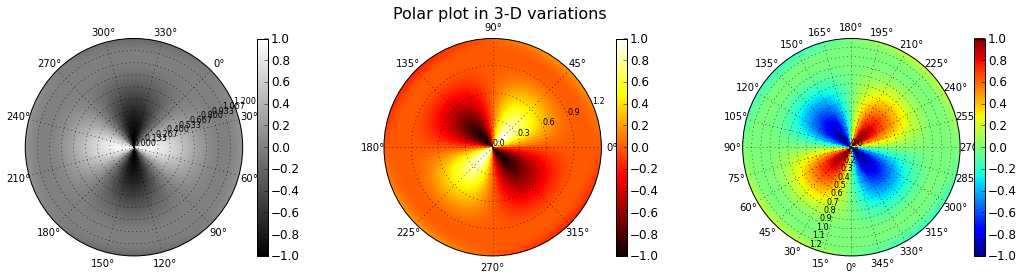

In [14]:
r = np.linspace(0,1.2,100)
p = np.linspace(0,2*np.pi,100)
P, R = np.meshgrid(p, r)
value =  ((R**2 - 1)**2) * np.sin(2 * P)
pmesh = ryplot.Plotter(1, 1, 3,'Polar plot in 3-D variations',figsize=(18,4))
pmesh.polarMesh(1, p, r, value, meshCmap = cm.gray, cbarshow=True,
              drawGrid=True, rgrid=[0,10],
              thetagridfontsize=10, radialgridfontsize=8,
              direction='clockwise', zerooffset=np.pi/4)
pmesh.polarMesh(2, p, r, value, meshCmap = cm.hot, cbarshow=True,
              drawGrid=True,thetagrid=[45], rgrid=[.25,1.25],
              thetagridfontsize=10, radialgridfontsize=8,
              direction='counterclockwise', zerooffset=0)
pmesh.polarMesh(3, p, r, value, meshCmap = cm.jet, cbarshow=True,
              drawGrid=True, thetagrid=[15], rgrid=[0.1, 0],
              thetagridfontsize=10, radialgridfontsize=8,
              direction='clockwise', zerooffset=-np.pi/2);

### Three-dimensional polar mesh plots

The [ryplot.Plotter.polar3d](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html?highlight=polar3d#pyradi.ryplot.Plotter.polar3d) displays polar information in a three-dimensional polar mesh format. 

The data values must be given on a fixed mesh grid of three-dimensional $(\theta,\rho,z)$ array input sets ($\theta$ is angle,  and $\rho$ is radial distance).
The mesh grid is defined in $(\theta,\rho)$, while the height of the mesh is the $z$ value.
The $(\theta,\rho)$ arrays may have non-constant grid-intervals, i.e., they do not
have to be on regular intervals.
        
Given an existing figure, this function plots in a specified subplot position.
Only one contour plot is drawn at a time.  Future contours in the same subplot
will cover any previous contours.

The data set must have three two dimensional arrays, each for $\theta$, $\rho$, and z.  The data in $\theta$, $\rho$, and z arrays must have matching data points.  The $\theta$ and $\rho$ arrays each define the grid in terms of $\theta$ and $\rho$ values, i.e., the $\theta$ array contains the angular values for the data set, while the $\rho$ array contains the radial values.  The z array contains the z values for the corresponding $\theta$ and $\rho$ values in the contour mesh.

The function signature is 

    polar3d(plotnum, theta, radial, zvals, ptitle=None, 
                xlabel=None, ylabel=None, zlabel=None, zscale=None,  
               titlefsize=12, xylabelfsize = 12,
               thetaStride=1, radialstride=1, meshCmap = cm.rainbow,
               linewidth=0.1, azim=45, elev=30)

- `plotnum (int)` subplot number, 1-based index
- `theta (np.array[N,M])` array of angular values [0..2pi] corresponding to (theta,rho) grid.
- `radial (np.array[N,M])` array of radial values  corresponding to (theta,rho) grid.
- `zvals (np.array[N,M])` array of z values  corresponding to (theta,rho) grid.
- `ptitle (string)` plot title (optional)
- `xlabel (string)` x-axis label (optional)
- `ylabel (string)` y-axis label (optional)
- `zlabel (string)` z-axis label (optional)
- `zscale ([float])` z axis [min, max] in the plot.
- `titlefsize (int)` title font size, default 12pt (optional)
- `xylabelfsize (int)` x, y, z label font size, default 12pt (optional)
- `thetaStride (int)` theta mesh line stride, every thetaStride value along angle values (optional).
- `radialstride (int)` radial mesh line stride, every radialstride value along radial values (optional).
- `meshCmap (cm)` color map for the mesh (optional)
- `linewidth (float)` width of the mesh lines
- `azim (float)` camera azimuth angle viewing the graph [degrees]
- `elev (float)` camera evelation angle viewing the graph [degrees]
- `zorder ([int])` list of zorder for drawing sequence, highest is last (optional)
- `clip_on (bool)` clips objects to drawing axes (optional)
- `facecolors ((np.array[N,M])` array of z value facecolours, corresponding to (theta,rho) grid.
- `alpha (float)` facecolour surface transparency (optional)
- `edgeCol ([int])` list of colour specs, value at [0] used for edge colour (optional).            
               
A two-dimensional plot has only only one sensible view, perpendicular on the plane of the graph.  A three-dimensional plot has many possible views. The view in the plot can be set by using the `elev` and `azim` values.

The 
[ryplot.Plotter.polar3d](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html?highlight=polar3d#pyradi.ryplot.Plotter.polar3d) function expects a mesh input. The mesh grid is defined in two arrays, the r (radial) array and the p (angle) array, created with `numpy.meshgrid`.  The `meshgrid` function returns two two-dimensional arrays, one
*varying along the r direction, with fixed p values* 
and the other 
*varying along the p direction, with fixed r values*. 
The two arrays, taken together, provides a collection of all possible combinations of x and y values, but in a structured manner: 
r varying along one axis and p varying along the other axis. 
The z array provides the z values for the corresponding r and p values. Study the output of the following code - note how one matrix varies along rows and the other along columns: collectively, they describe all possible combinations of p and r. Carefully consider the size of the two arrays.

In [15]:
r = np.linspace(0,1.25,4) # radial
p = np.linspace(0,2*np.pi,9) # angular
#build a meshgrid (2-D array of values)
R,P = np.meshgrid(r,p)
print(R.shape)
print(R)
print(P.shape)
print(P)

(9, 4)
[[ 0.          0.41666667  0.83333333  1.25      ]
 [ 0.          0.41666667  0.83333333  1.25      ]
 [ 0.          0.41666667  0.83333333  1.25      ]
 [ 0.          0.41666667  0.83333333  1.25      ]
 [ 0.          0.41666667  0.83333333  1.25      ]
 [ 0.          0.41666667  0.83333333  1.25      ]
 [ 0.          0.41666667  0.83333333  1.25      ]
 [ 0.          0.41666667  0.83333333  1.25      ]
 [ 0.          0.41666667  0.83333333  1.25      ]]
(9, 4)
[[ 0.          0.          0.          0.        ]
 [ 0.78539816  0.78539816  0.78539816  0.78539816]
 [ 1.57079633  1.57079633  1.57079633  1.57079633]
 [ 2.35619449  2.35619449  2.35619449  2.35619449]
 [ 3.14159265  3.14159265  3.14159265  3.14159265]
 [ 3.92699082  3.92699082  3.92699082  3.92699082]
 [ 4.71238898  4.71238898  4.71238898  4.71238898]
 [ 5.49778714  5.49778714  5.49778714  5.49778714]
 [ 6.28318531  6.28318531  6.28318531  6.28318531]]


The first example creates an angular grid of 50 points in $2\pi$, and 25 radial values in the range [0:1.25].  The meshgrid creates the two two-dimensional arrays, which is used to calculate the z values and plot the data.  The same graph is viewed from two different camera view points.

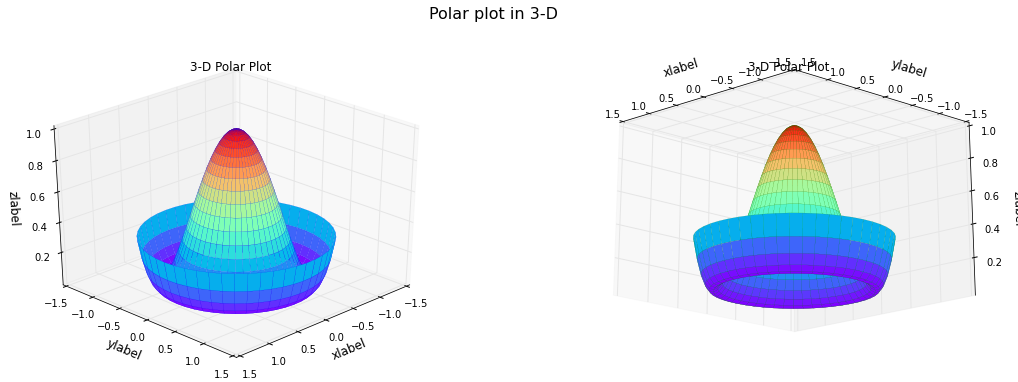

In [16]:
r = np.linspace(0,1.25,25) # radial
p = np.linspace(0,2*np.pi,50) # angular
#build a meshgrid (2-D array of values)
R,P = np.meshgrid(r,p)
#calculate the z values on the cartesian grid
value = ((R**2 - 1)**2)
p3D = ryplot.Plotter(1, 1, 2, 'Polar plot in 3-D', figsize=(18,6))
p3D.polar3d(1, p, r, value, ptitle='3-D Polar Plot',
    xlabel='xlabel', ylabel='ylabel', zlabel='zlabel')
p3D.polar3d(2, p, r, value, ptitle='3-D Polar Plot',
    xlabel='xlabel', ylabel='ylabel', zlabel='zlabel',azim=135,elev=-20);


The following example reads data from a file and displays the results in different views. The file is read from the internet, unzipped and the results are displayed.  The second graph also illustrates how to create a hole in the centre, which is sometimes required to show a graphic.

In [17]:
import pyradi.ryfiles as ryfiles
import pyradi.ryutils as ryutils

tgzFilename = 'Intensity-max.tgz'
destinationDir = '.'
tarFilename = 'Intensity-max.tar'
url = 'https://raw.githubusercontent.com/NelisW/pyradi/master/pyradi/data/'
dlNames = ryfiles.downloadUntar(tgzFilename, url, destinationDir, tarFilename)

print('filesAvailable are {}'.format(dlNames))

filesAvailable are ['Intensity-max.dat']


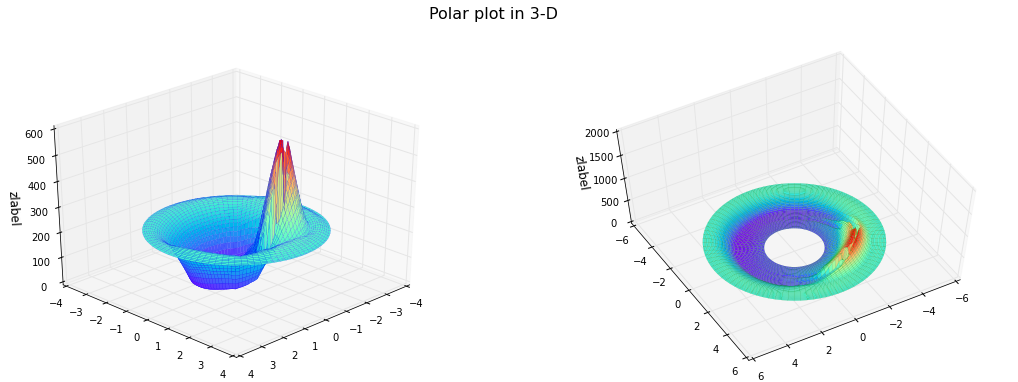

In [18]:
if dlNames:
    with open('./Intensity-max.dat', 'rt') as fin:
        aArray = np.loadtxt( fin, skiprows=1 , dtype=float )
        azim = aArray[1:,0] + np.pi   # to positive angles
        elev = aArray[0,1:] + np.pi/2 # get out of negative data on polar
        intensity = aArray[1:,1:]

        p3D = ryplot.Plotter(1, 1, 2,'Polar plot in 3-D',figsize=(18,6))
        p3D.polar3d(1, azim, elev, intensity, zlabel='zlabel',zscale=[0, 600], azim=45, elev=30)
        p3D.polar3d(2, azim, elev + np.pi/2, intensity, zlabel='zlabel',zscale=[0, 2000], azim=60, elev=60);


## Plotting on a sphere

This examples plots random points on a sphere.  It covers the forming of a sphere using `Mesh3D` as well as calculating the position of the points.

1. Biased: Using independently generated random elevation and azimuth angles provides a biased spherical distribution: as the longitudinal lines bundles up approach the poles, the density of samples increases.  This distribution is determined by independently calculating  $\theta = 2\pi u$  (azimuth) and $\phi = (\pi/2)(2u-1)$ (elevation) where $u$ is a uniform random number generator $u\in[0,1)$. Ideally, $\phi$ should be calculated over $u\in[0,1]$, but in practice this is of little practical significance.

2. Uniform: Independently generated  random elevation and azimuth angles can yield a uniform sample density if the longitudinal (elevation) variable is mapped to counter the increased density towards the poles, see [here](https://en.wikibooks.org/wiki/Mathematica/Uniform_Spherical_Distribution) and [here](http://mathworld.wolfram.com/SpherePointPicking.html). This is done by calculating $\theta = 2\pi u$  (azimuth) and $\phi=\cos^{-1}(2u-1)-\pi/2$ (elevation) where $u$ is a uniform random number generator $u\in[0,1)$. Ideally, $\phi$ should be calculated over $u\in[0,1]$, but in practice this is of little practical significance.

In [19]:
#create the wireframe for the sphere
u = np.linspace(0, np.pi, 100)
v = np.linspace(0, 2 * np.pi, 100)
x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones_like(v))

Next create two sets of random points on the sphere, using the two algorithms described above, and plot. Note on the left plot, how the density on the poles is higher (polar bias) than on the right plot (uniform law, bias corrected).

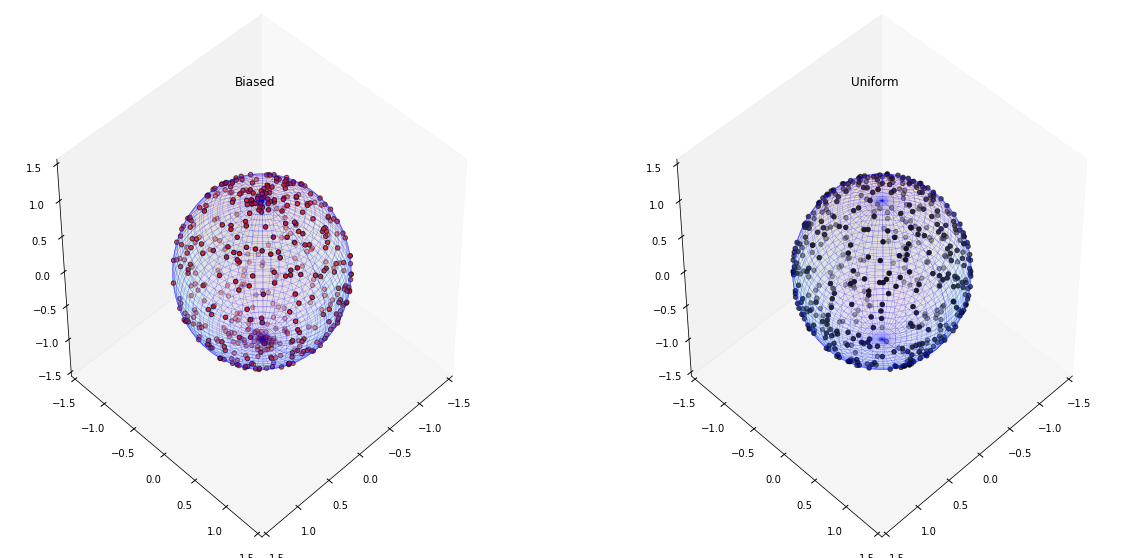

In [20]:
#create the random point samples on the sphere
samples = 500
np.random.RandomState(200)
theta = 2 * np.pi * np.random.uniform(0, 1, size=samples)
#biased sampling with higher density towards the poles
phib = np.pi * (2 * np.random.uniform(0, 1, size=samples) -1 ) / 2 
#uniform sampling corrected for polar bias
phiu = np.arccos(2 * np.random.uniform(0, 1, size=samples) -1 ) - np.pi/2 

#create normal vectors using the pairs of random angles in a transformation 
xsb = np.cos(phib) * np.cos(theta)
ysb = np.cos(phib) * np.sin(theta)
zsb = np.sin(phib)
xsu = np.cos(phiu) * np.cos(theta)
ysu = np.cos(phiu) * np.sin(theta)
zsu = np.sin(phiu)

azim = 45 # view angle
elev = 45 # view angle
sph = ryplot.Plotter(1,1,2, figsize=(20,10))
sph.mesh3D(1,x,y,z, ptitle='Biased', alpha=0.1, wireframe=False, surface=True,linewidth=0, drawGrid=False)
sph.mesh3D(1,x,y,z, alphawire=0.4, wireframe=True, surface=False, 
    edgeCol=['b'],plotCol=['b'],linewidth=0.4,rstride=2,cstride=2, drawGrid=False)
sph.plot3d(1, xsb, ysb, zsb,  scatter=True,markers=['o' for i in range(len(xsb))],
           azim=azim, elev=elev)

sph.mesh3D(2,x,y,z, ptitle='Uniform',alpha=0.1, wireframe=False, surface=True,linewidth=0, drawGrid=False)
sph.mesh3D(2,x,y,z, alphawire=0.4, wireframe=True, surface=False, 
    edgeCol=['b'],plotCol=['b'],linewidth=0.4,rstride=2,cstride=2, drawGrid=False)
sph.plot3d(2, xsu, ysu, zsu, scatter=True,markers=['o' for i in range(len(xsu))],
           azim=azim, elev=elev);

## Custom colours on a surface

Usually the patch face colours are proportional to the z-axis values. In some instances it may be required to use face colours on an $(x,y,x)$ surface that are not derived from the $z$ value.

<https://stackoverflow.com/questions/6539944/color-matplotlib-plot-surface-command-with-surface-gradient>

The following code creates the $(x,y,z)$ surface upon which the face colours will be draped.  The two graphs below are drawn from exactly the same data.

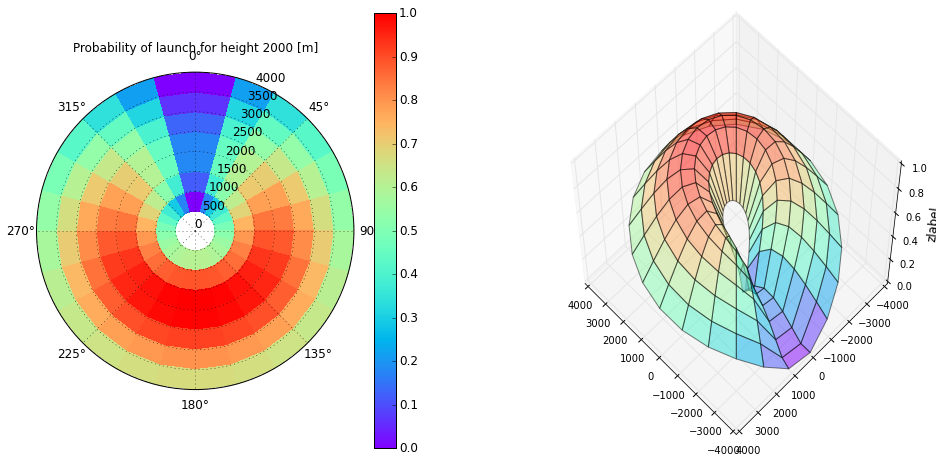

In [21]:
import numpy as np
import pandas as pd
import pyradi.ryplot as ryplot
from matplotlib import cm

#next line include both 0 and 360 degrees, i.e., overlap on edge
angled = np.linspace(0.,360.,25) 
angler = np.pi * angled / 180.
grange = np.linspace(500.,4000.,8)
#create a 2-D meshgrid.
grangeg, anglerg= np.meshgrid(grange,angler + np.pi * 7.5 / 180)

height  = 2000.
launch = (1 + np.cos(anglerg) ) ** .1 * (1 - np.exp(-( 500 + grangeg) / 2000.) ) 
launch *=  np.exp(-( 500 + grangeg) / (6000. -  height))
launch = np.where(launch<0.2, 0.2, launch)
#normalise
launch -= np.min(launch)
launch /= np.max(launch)

pm = ryplot.Plotter(1,1,2,figsize=(16,8))
pm.polarMesh(1,angler+np.pi, grange, launch.T,
    ptitle='Probability of launch for height {:.0f} [m]'.format(height),
    radscale=[0, 4000], cbarshow=True,
    cbarorientation='vertical', cbarcustomticks=[], cbarfontsize=12,
    rgrid=[500], thetagrid=[45], drawGrid=True,
    direction='clockwise', zerooffset=np.pi/2, )
pm.polar3d(2, angler, grange, launch, zlabel='zlabel',
    linewidth=1, zscale=[0, 1], azim=135, elev=60, alpha=0.5,edgeCol=['k']);

Next download and plot the data to form the face colours to be draped across the shape calculated above.

In [22]:
import pyradi.ryutils as ryutils
# import pyradi.ryplot as ryplot
# import numpy as np

tgzFilename = 'missLUT-2000-e.tgz'
destinationDir = '.'
tarFilename = 'missLUT-2000-e.tar'
url = 'https://raw.githubusercontent.com/NelisW/pyradi/master/pyradi/data/'
dlNames = ryfiles.downloadUntar(tgzFilename, url, destinationDir, tarFilename)

print('filesAvailable are {}'.format(dlNames))

filesAvailable are ['missLUT-2000-e.txt']


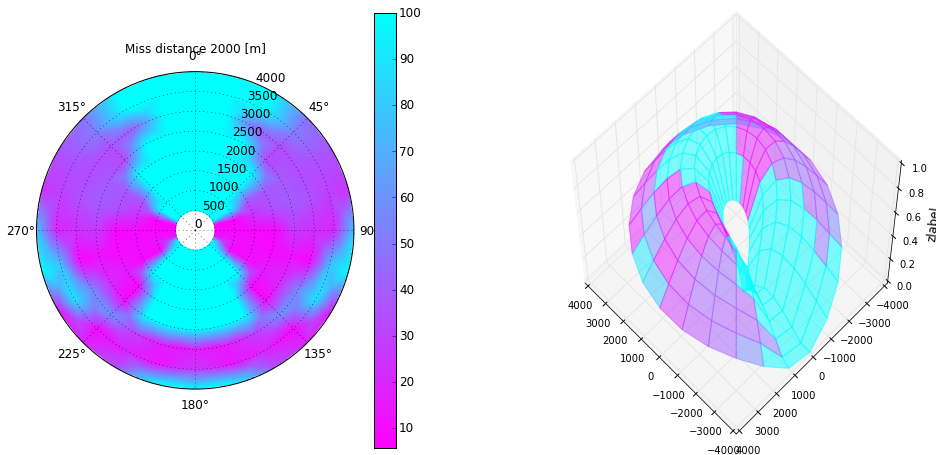

In [23]:
with open(dlNames[0]) as f:
    lines = f.readlines()
    xlabel, ylabel, ptitle = lines[0].split()
#read the lookup table, extract azim, zenith and table
aArray = np.loadtxt(dlNames[0], skiprows=1, dtype=float)
azim1D = aArray[1:, 0] 
height1D = aArray[0, 1:] * 180 / np.pi
missD = aArray[1:, 1:]
missD = np.clip(missD,0,100.)

pm = ryplot.Plotter(1,1,2,figsize=(16,8))
pm.polarMesh(1,angler+np.pi, grange, missD.T,
    ptitle='Miss distance {:.0f} [m]'.format(height), shading='gouraud',
    radscale=[0, 4000], cbarshow=True,  meshCmap=cm.cool_r,
    cbarorientation='vertical', cbarcustomticks=[], cbarfontsize=12,
    rgrid=[500], thetagrid=[45], drawGrid=True,
    direction='clockwise', zerooffset=np.pi/2, )

missD /= np.max(missD)
pm.polar3d(2, angler, grange, launch, zlabel='zlabel',facecolors=cm.cool_r(missD),
    linewidth=1, zscale=[0, 1], azim=135, elev=60, alpha=0.5,edgeCol=['k']);

## Interactive three-dimensional plotting

The following example provides an interactive window allowing zooming and view direction changes.

The interactive window breaks the IPython notebook execution if all cells are executed. For this reason it is commented out here, please uncomment the `%matplotlib tk` and `p.getPlot().show()` lines to use.

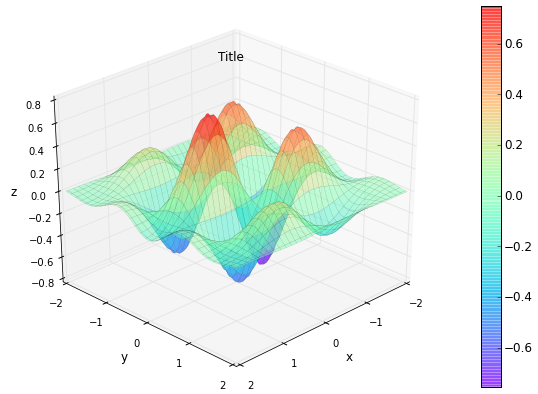

In [24]:
def myFunc(x,y):
  scale = np.sqrt(np.exp(-(x**2 +y**2)))
  return np.sin(2 * x) * np.cos(4 * y) * scale

x = np.linspace(-2, 2, 101)
y = np.linspace(-2, 2, 101)
varx, vary = np.meshgrid(x, y)
zdata = myFunc(varx.flatten(), vary.flatten()).reshape(varx.shape)
# %matplotlib qt
# %matplotlib tk
p = ryplot.Plotter(1,1,1,figsize=(10,7));
p.mesh3D(1, varx, vary, zdata, ptitle='Title', xlabel='x', ylabel='y', zlabel='z',
  plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.1, maxNX=5, maxNY=5, maxNZ=0,
  drawGrid=True, cbarshow=True, alpha=0.5);
# p.getPlot().show()

## Alternative three-dimensional plot libraries

### mpld3

The mpld3 project brings together Matplotlib, the popular Python-based graphing library, and D3js, the popular Javascript library for creating interactive data visualizations for the web. The result is a simple API for exporting your matplotlib graphics to HTML code which can be used within the browser, within standard web pages, blogs, or tools such as the IPython notebook.  
<https://mpld3.github.io/>  
<https://github.com/jakevdp/mpld3>  
<http://nbviewer.ipython.org/github/mpld3/matplotlylib/blob/master/notebooks/Plotly%20and%20mpld3.ipynb>  

## Marker Symbols

Matplotlib has a rich marker set.  These markers have several variations in shape, fill and colour. The 
[ryplot.Markers](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Markers) class provides a mechanism to add markers to a graph, without actually plotting a line.  This is useful to mark some region in a contour graph or an image.  The [ryplot.Markers](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Markers) class uses filled markers (13 shapes), each with six fill styles, with at least seven colours and al least seven alternative colours; giving  3822 variations of marker symbols.

Each symbol is cut into half, with the symbol colour in one half and the alternative colour in the other half.  The fill style van be one of ['full', 'left', 'right', 'bottom', 'top', 'none'].

The filled markers include ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd'], as illustrated in the graph below.

<http://matplotlib.org/examples/pylab_examples/filledmarker_demo.html>  
<http://matplotlib.org/api/markers_api.html>  
<http://matplotlib.org/api/markers_api.html#matplotlib.markers.MarkerStyle.filled_markers>


The [ryplot.Markers](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Markers) works as follows:

1. Create a [ryplot.Plotter](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter) instance and create the plot you want to superimpose the markers onto.

2. Create a [ryplot.Markers](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Markers)  instance to contain the markers.

3.  Then [Markers.add](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Markers.add) as many markers as required. The  function signature is `add(x, y, markerfacecolor=None, markerfacecoloralt=None, markeredgecolor=None, marker=None, markersize=None, fillstyle=None)`. The parameters are self-describing.  Provide a  marker and fillstyle definition as described below.

4.  When all the markers are added, [Markers.plot](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Markers.plot) the markers on the subplot.


In the following graph each symbol is labelled with the following format: colour-markerID-fillStyle. Each symbol can be given a primary colour and an alternative colour.

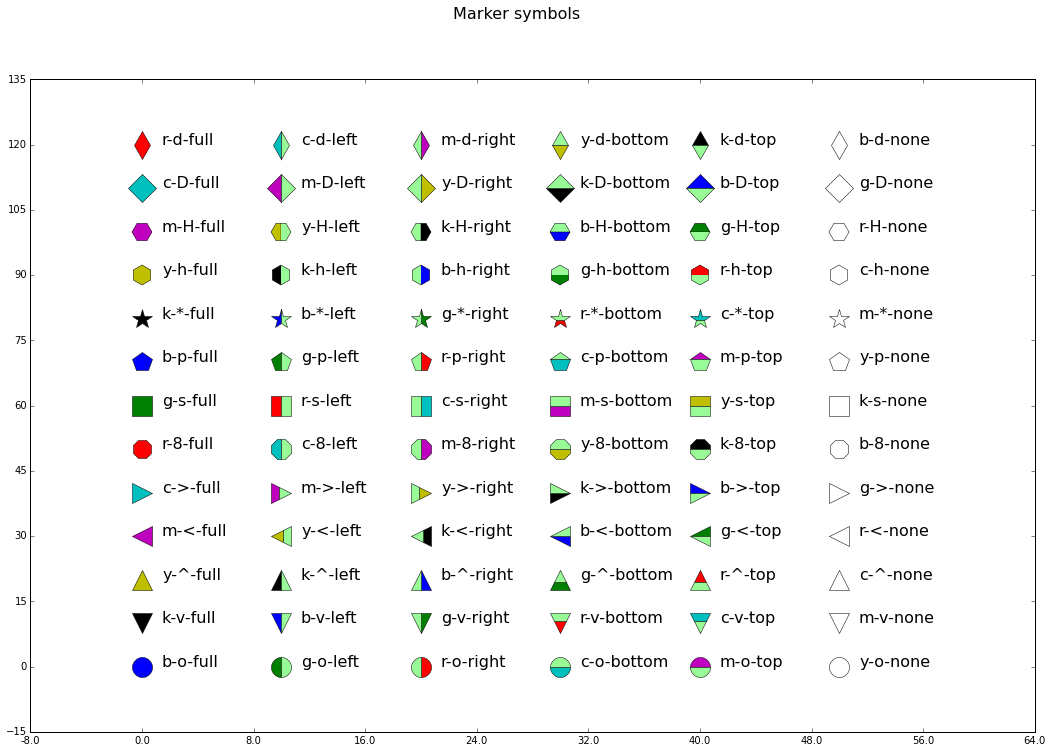

In [25]:
import itertools
from matplotlib import rc
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

plt.rc('text', usetex=False) # otherwise, '^' will cause trouble

pm = ryplot.Plotter(1, 1, 1,'Marker symbols',figsize=(18,12))
pm.plot(1,np.asarray([-8,60]),np.asarray([-10,125]),plotCol=['w'], drawGrid=False)
markers = ryplot.Markers(markerfacecolor='y', marker='*')

colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])

for j,marker in enumerate(mlines.Line2D.filled_markers):
    for i,fs in enumerate(mlines.Line2D.fillStyles):
        color = colors.next()
        markers.add(i*10,j*10,markerfacecolor=color, marker=marker,fillstyle=fs,markerfacecoloralt='PaleGreen')
        lab = '{}-{}-{}'.format(color, marker,fs)
        pm.getSubPlot(1).text(i*10+1.5,j*10, '{}-{}-{}'.format(color, marker,fs), 
              horizontalalignment='left', fontsize=16)
        
markers.plot(pm.getSubPlot(1));

The following graphic shows markers superimposed on some of the graphs already seen in this notebook.

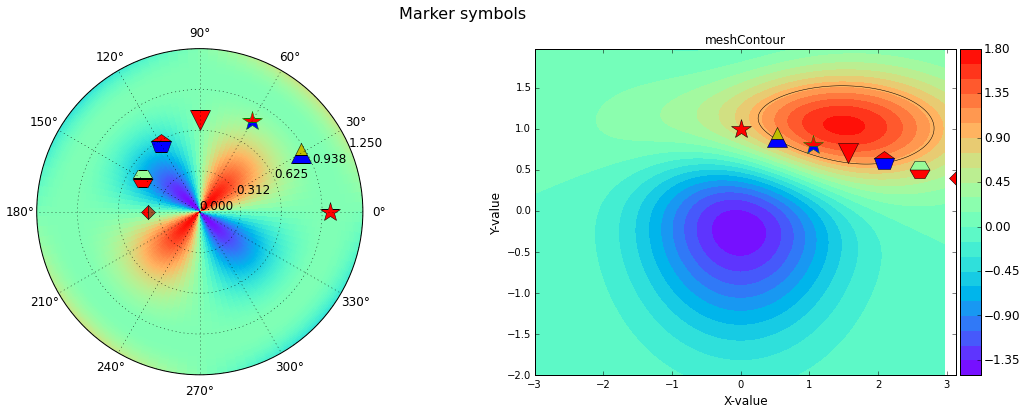

In [26]:
pm = ryplot.Plotter(1, 1, 2,'Marker symbols',figsize=(18,6))
#create the radial and angular vectors
r = np.linspace(0,1.25,100)
p = np.linspace(0,2*np.pi,100)
P, R = np.meshgrid(p, r)
value =  ((R**2 - 1)**2) * np.sin(2 * P)
pm.polarMesh(1, p, r, value, rgrid=[0,5], drawGrid=True, cbarshow=False, contourLine=False)

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)
pm.meshContour(2, X, Y, Z, levels=30, ptitle='meshContour', xlabel='X-value', ylabel='Y-value',
                shading='gouraud', plotCol=['k'], titlefsize=12, meshCmap=cm.rainbow,zeroContourLine=True,
                cbarshow=True, cbarorientation='vertical', cbarfontsize=12, drawGrid=False, 
                negativeSolid=False, contourFill=True, contourLine=False, logScale=False)

# add filled markers
markers = ryplot.Markers(markerfacecolor='r', marker='*')
markers.add(0*np.pi/6,1)
markers.add(1*np.pi/6,0.9,markerfacecolor='y', marker='^',fillstyle='top')
markers.add(2*np.pi/6,0.8,fillstyle='top',markeredgecolor='g')
markers.add(3*np.pi/6,0.7,marker='v')
markers.add(4*np.pi/6,0.6,marker='p',fillstyle='top')
markers.add(5*np.pi/6,0.5,markerfacecolor='r',marker='H',fillstyle='bottom',markerfacecoloralt='PaleGreen')
markers.add(6*np.pi/6,0.4,marker='D',fillstyle='left',markerfacecoloralt='Sienna',markersize=10)
markers.plot(pm.getSubPlot(1))
markers.plot(pm.getSubPlot(2));


In [27]:
from matplotlib import rc
plt.rc('text', usetex=True)

## Plotting Images

The [ryplot.Plotter.showImage](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html?highlight=showimage#pyradi.ryplot.Plotter.showImage) function provides the functionality to display images in a graph.  The user can supply a colour map (a grey level map is also a colour map).

The function signature is

    showImage(plotnum, img,  ptitle=None, cmap=plt.cm.gray, titlefsize=12, cbarshow=False, 
                  cbarorientation = 'vertical', cbarcustomticks=[], cbarfontsize = 12)

- `plotnum (int)` subplot number, 1-based index
- `img (np.ndarray)` numpy 2d array
- `ptitle (string)` plot title (optional).
- `xlabel (string)` x axis label (optional).
- `ylabel (string)` y axis label (optional).
- `cmap` matplotlib colormap, default gray (optional).
- `fsize (int)` title font size, default 12pt (optional).
- `cbarshow (bool)` if true, the show a colour bar  (optional).
- `cbarorientation (string)` 'vertical' (right) or 'horizontal' (below)  (optional).
- `cbarcustomticks zip([z values/float],[tick labels/string])`  define custom colourbar ticks locations for given z values(optional).
- `cbarfontsize (int)` font size for colour bar  (optional).


The next example display several image plots and variations of the image presentations.  The first three graphs are from the same data set.

1.  The image is plotted with colour bar underneath the image.  The `plt.cm.winter` colour map is used.

2.  The image is plotted with colour bar besides the image.  The `ryplot.cubehelixcmap()` colour map is used.

3.  Sections through the dataset is shown for correlation with the first two images.

4.  A blurred Siemens star is read from a png file and displayed with a grey scale colour map.

5.  The same data set as in the blurred Siemens star, but this star is unfolded to a cartesian coordinate system.

6.  The picture of a simulated infrared image of an aircraft is read from a unsigned long binary raw file.

Download the files to be plotted from the internet (internet connection required).

In [28]:
import pyradi.ryfiles as ryfiles
import pyradi.ryutils as ryutils

tgzFilename = 'sample.tgz'
destinationDir = '.'
tarFilename = 'sample.tar'
url = 'https://raw.githubusercontent.com/NelisW/pyradi/master/pyradi/data/'
dlNames = ryfiles.downloadUntar(tgzFilename, url, destinationDir, tarFilename)
print('filesAvailable are {}'.format(dlNames))

tgzFilename = 'siemensstar.tgz'
tarFilename = 'siemensstar.tar'
dlNames = ryfiles.downloadUntar(tgzFilename, url, destinationDir, tarFilename)
print('filesAvailable are {}'.format(dlNames))

filesAvailable are ['sample.ulong']
filesAvailable are ['600px-Siemens_star-blurred.png', 'Siemens_Star-unfolded.png']


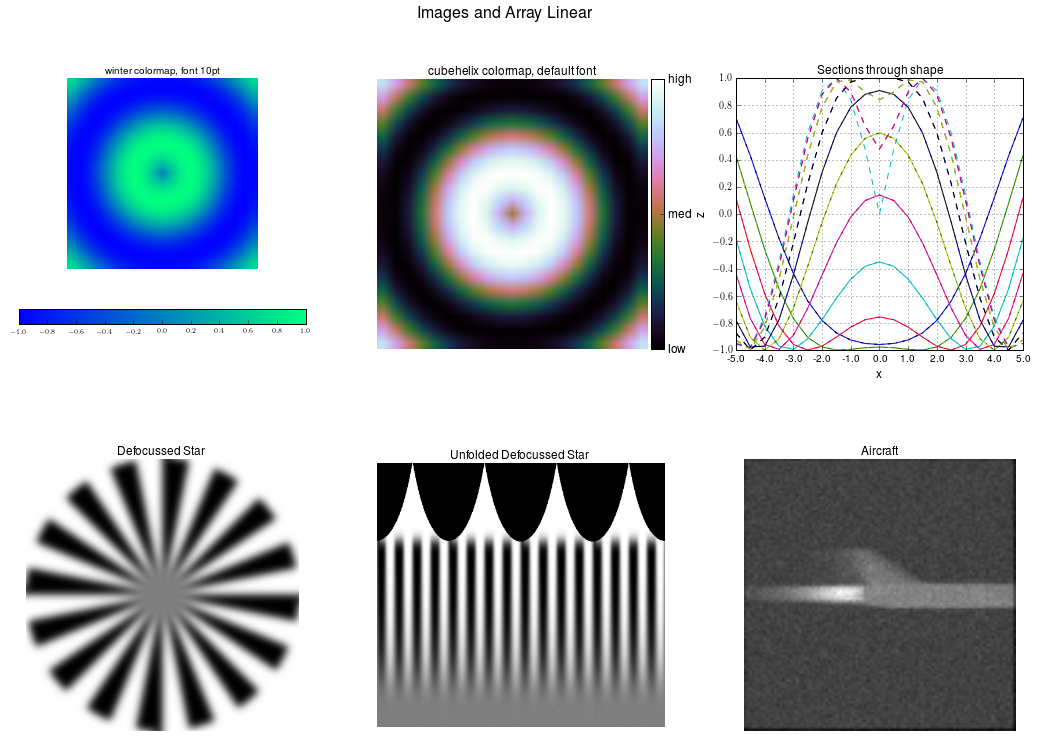

In [29]:
# use imread from the scipy library to read the png images from file.
from scipy.misc import imread
#read from the binary file using a pyradi function
frames, img = ryfiles.readRawFrames('sample.ulong', 100, 100, np.uint32, [5])

xv,yv = np.mgrid[-5:5:21j, -5:5:21j]
z = np.sin(np.sqrt(xv**2 + yv**2))

I = ryplot.Plotter(4, 2, 3,'Images and Array Linear', figsize=(18, 12))

I.showImage(1, z, ptitle='winter colormap, font 10pt', cmap=plt.cm.winter, titlefsize=10,  cbarshow=True, cbarorientation = 'horizontal', cbarfontsize = 7)
barticks = zip([-1, 0, 1], ['low', 'med', 'high'])
I.showImage(2, z, ptitle='cubehelix colormap, default font ',cmap=ryplot.cubehelixcmap(), cbarshow=True, cbarcustomticks=barticks)
I.plot(3, xv[:, 1],  z, "Sections through shape","x", "z")
I.showImage(4, imread('600px-Siemens_star-blurred.png', flatten=1), ptitle='Defocussed Star')
I.showImage(5, imread('Siemens_Star-unfolded.png', flatten=1), ptitle='Unfolded Defocussed Star')
I.showImage(6, img[0], ptitle='Aircraft');

## Python and [module versions, and dates](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)

In [30]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, pyradi

Software versions
Python 2.7.8 32bit [MSC v.1500 32 bit (Intel)]
IPython 3.0.0
OS Windows 7 6.1.7601 SP1
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pyradi 0.1.55
Sat Apr 04 21:56:25 2015 South Africa Standard Time